### I. Generating Example Classification Data

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
h = 1
sd = 1
n = 50

In [3]:
def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)
    x2 = ss.norm.rvs(h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    return (x1, y1, x2, y2)

In [4]:
ss.norm.rvs(0, 1, 5)

array([-1.38864927,  1.83189844, -0.40651318, -0.93920954, -0.02000603])

In [5]:
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)

In [6]:
def plot_data(x1, y1, x2, y2):
    plt.figure(figsize=(6,6))
    plt.plot(x1, y1, "o", ms=2)
    plt.plot(x2, y2, "o", ms=2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

In [7]:
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)

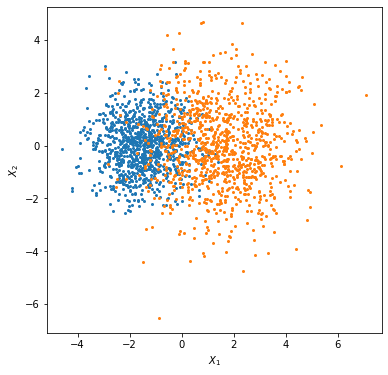

In [8]:
plot_data(x1, y1, x2, y2)

### II. Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
clf = LogisticRegression()

In [11]:
np.vstack((x1,y1))

array([[ 0.15914195, -0.9500034 , -1.9483299 , ..., -1.55357895,
        -1.44358136, -3.04392364],
       [ 1.79904398, -0.3226898 , -0.19582018, ...,  0.45695817,
        -1.28172094, -0.20318512]])

In [12]:
np.vstack((x1,y1)).shape

(2, 1000)

In [13]:
# Transpose
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))

In [14]:
X.shape

(2000, 2)

In [20]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))

In [21]:
y.shape

(2000,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [23]:
y_train.shape

(1000,)

In [24]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
clf.score(X_test, y_test)

0.89

In [27]:
clf.predict_proba(np.array([-2,0]).reshape(1, -1))

array([[0.96736913, 0.03263087]])

In [29]:
clf.predict(np.array([-2,0]).reshape(1, -1))

array([1])

### III. Computing Predictive Probabilities Across the Grid